In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,6401,6.667418e-05,4.911904e-06,-4.834768e-08,1.834422e-05,1.648663e-05,8.889640e-05,1.841646e-05
1,2900,-3.275464e-07,6.551040e-07,-2.889297e-07,-2.284409e-08,-1.092479e-08,-7.657841e-09,-1.374594e-06
2,1702,2.801538e-06,1.242774e-08,1.412464e-08,1.126489e-08,-3.479104e-09,3.711351e-07,2.369461e-08
3,656,4.902389e-09,7.397857e-09,2.502922e-09,1.137659e-08,1.046734e-08,9.269137e-09,9.731540e-09
4,3331,-1.760969e-05,1.322258e-06,-6.070416e-05,1.714275e-06,1.734014e-06,2.879674e-06,-9.530607e-05


In [8]:
AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

In [14]:
mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

desv_AWI = [np.std(AWI_ba), np.std(AWI_sp1), np.std(AWI_sp2), np.std(AWI_sp3), np.std(AWI_sp4), 
            np.std(AWI_sp5), np.std(AWI_sp6)]

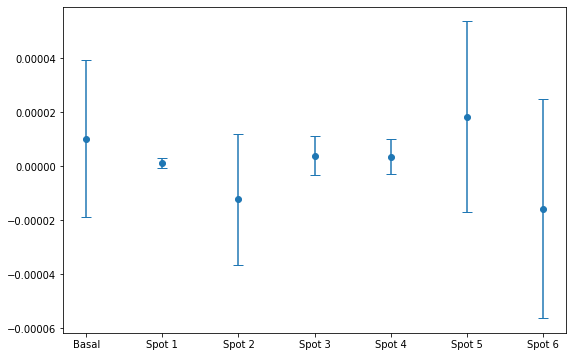

In [61]:
labels = ['Basal', 'Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(9,6))
plt.errorbar(np.arange(len(labels)), mean_AWI, desv_AWI, fmt = "o ", capsize= 5)
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()